In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("E:\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
#shape
df.shape

(303, 14)

In [5]:
#inforamtion of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#checking missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#data exploration
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
#checking the distribution of target variable 0-healthy disease 1-defective heart
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

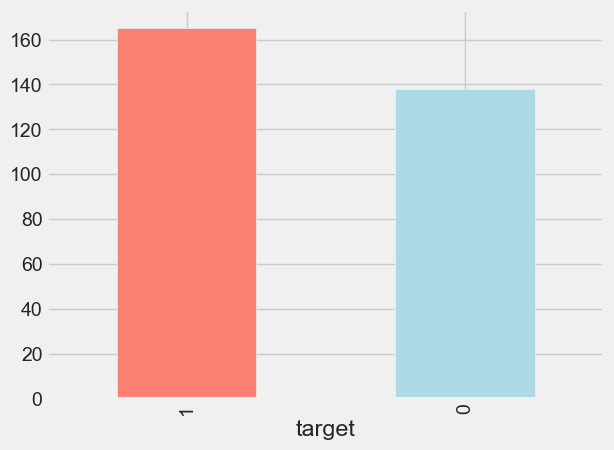

In [9]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [10]:
#splitting the feature and target y contain target variable
x=df.drop(columns='target',axis=1)
y=df['target']
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0     2.30   
1     37    1   2       130   250    0        1      187      0     3.50   
2     41    0   1       130   204    0        0      172      0     1.40   
3     56    1   1       120   236    0        1      178      0     0.80   
4     57    0   0       120   354    0        1      163      1     0.60   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1     0.20   
299   45    1   3       110   264    0        1      132      0     1.20   
300   68    1   0       144   193    1        1      141      0     3.40   
301   57    1   0       130   131    0        1      115      1     1.20   
302   57    0   1       130   236    0        0      174      0     0.00   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [11]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


<Axes: title={'center': 'Correlation with target'}>

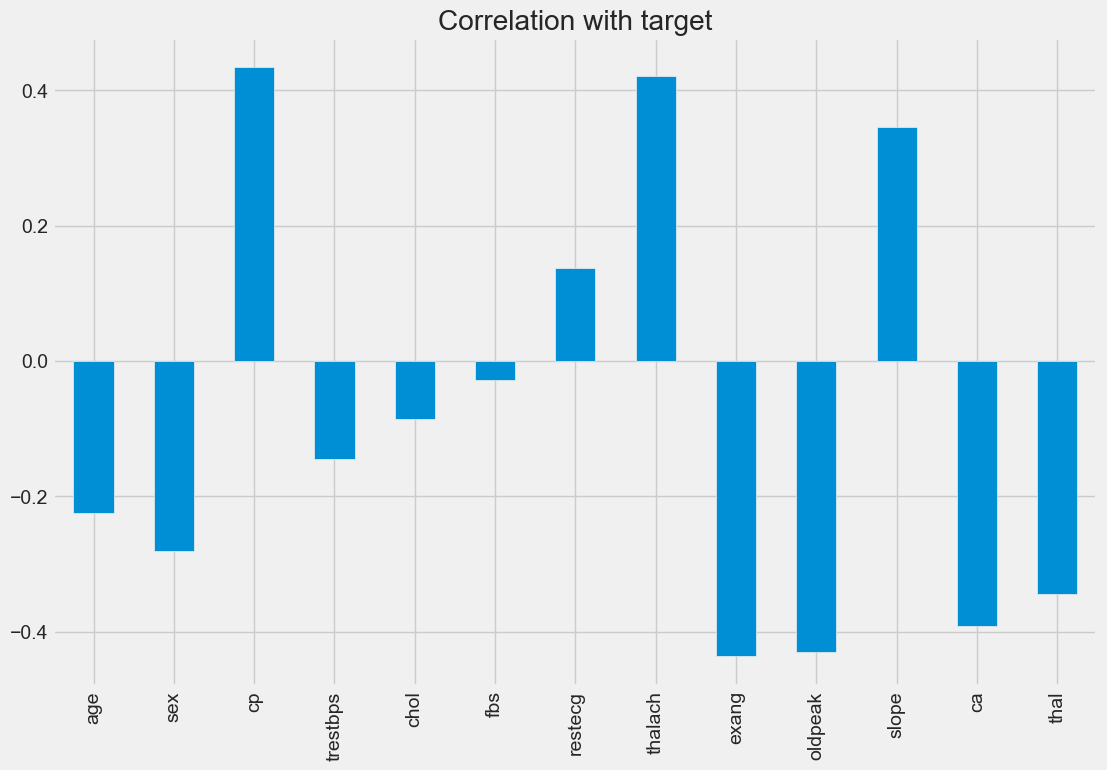

In [12]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [13]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

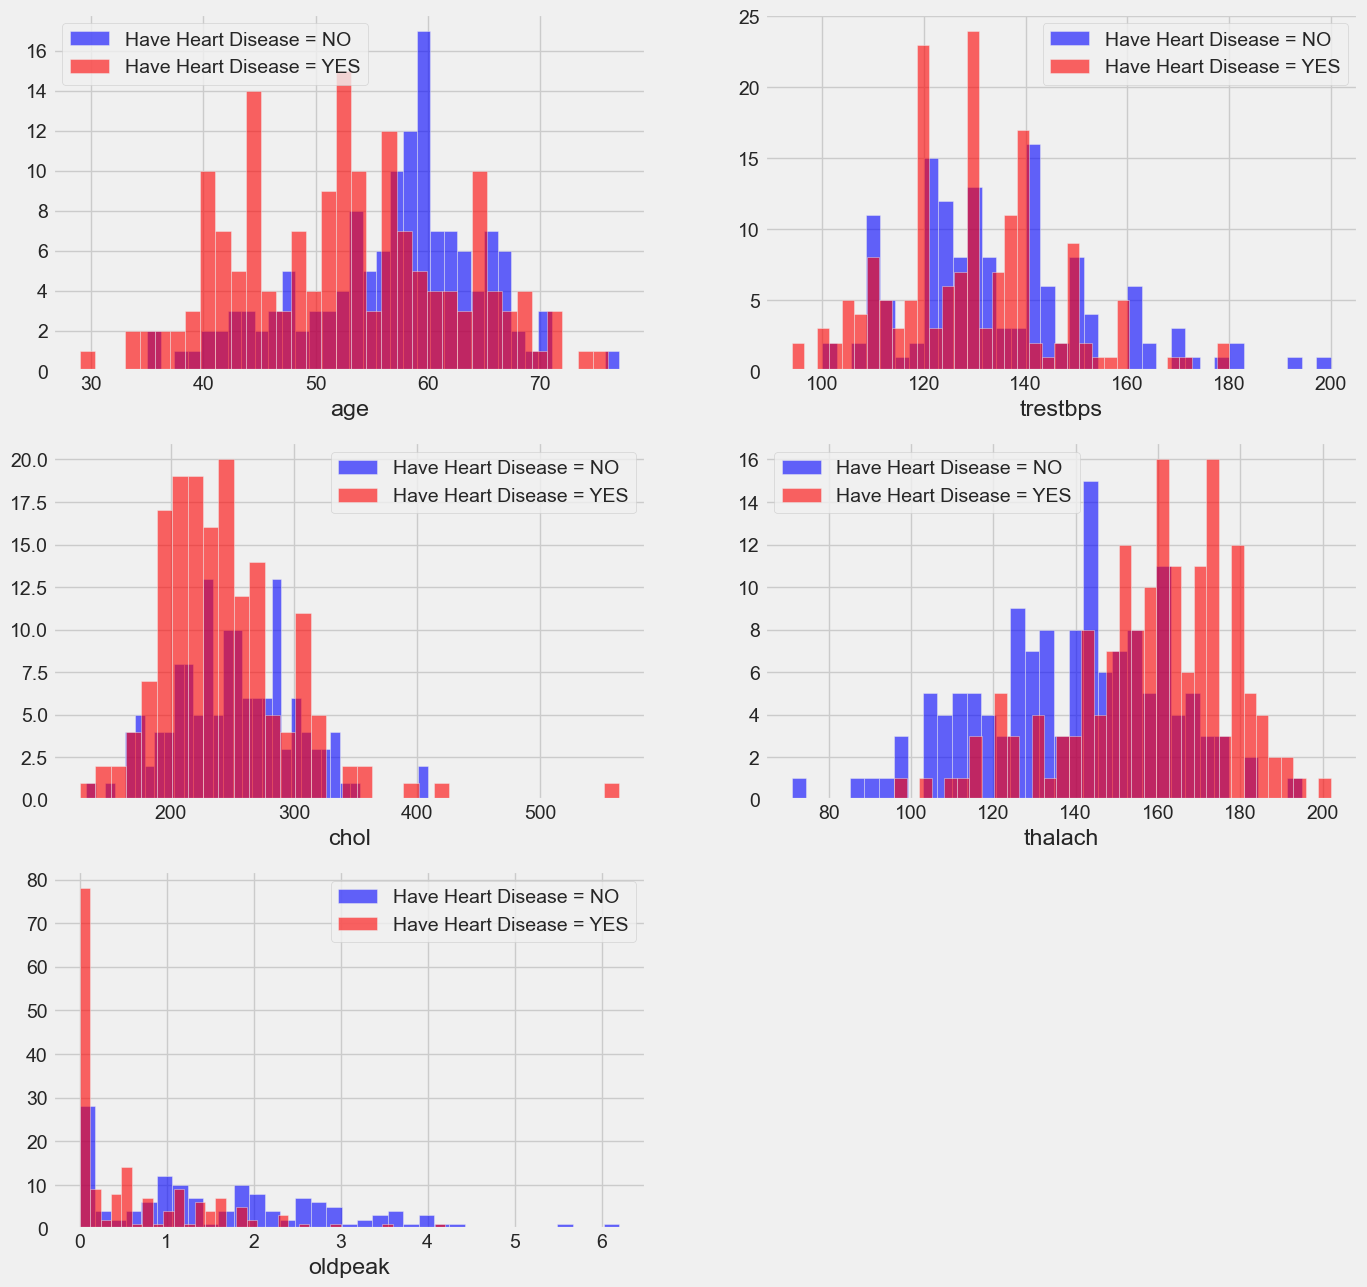

In [14]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

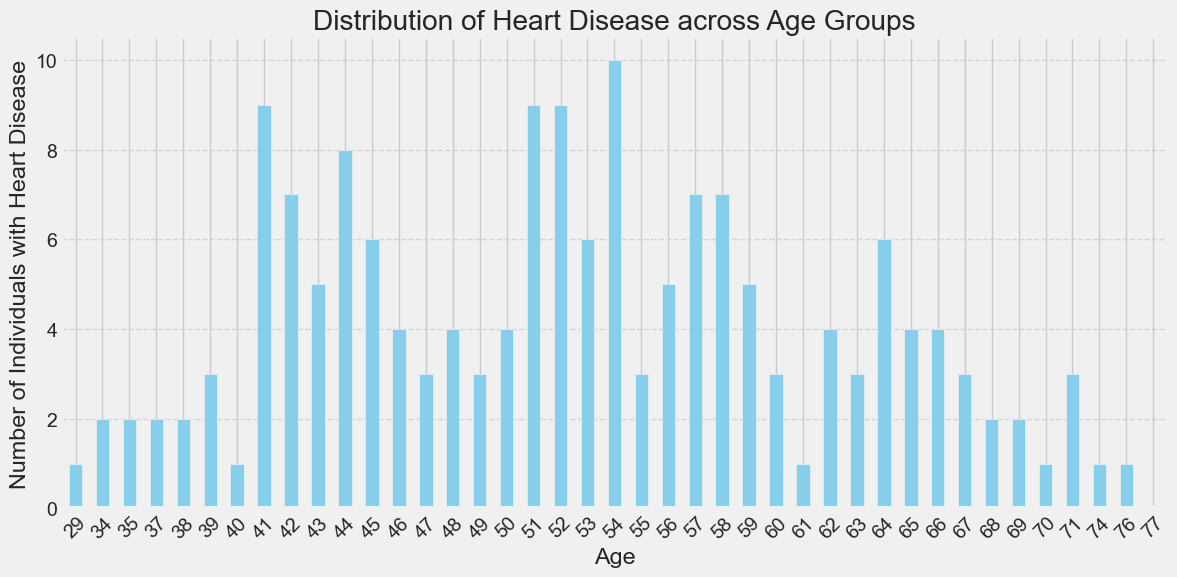

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
heart_data = pd.read_csv('E:\heart.csv')

# Group data by age and calculate the count of individuals suffering from heart disease for each age group
age_group_counts = heart_data.groupby('age')['target'].sum()

# Plot a bar graph
plt.figure(figsize=(12, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Heart Disease across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Individuals with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

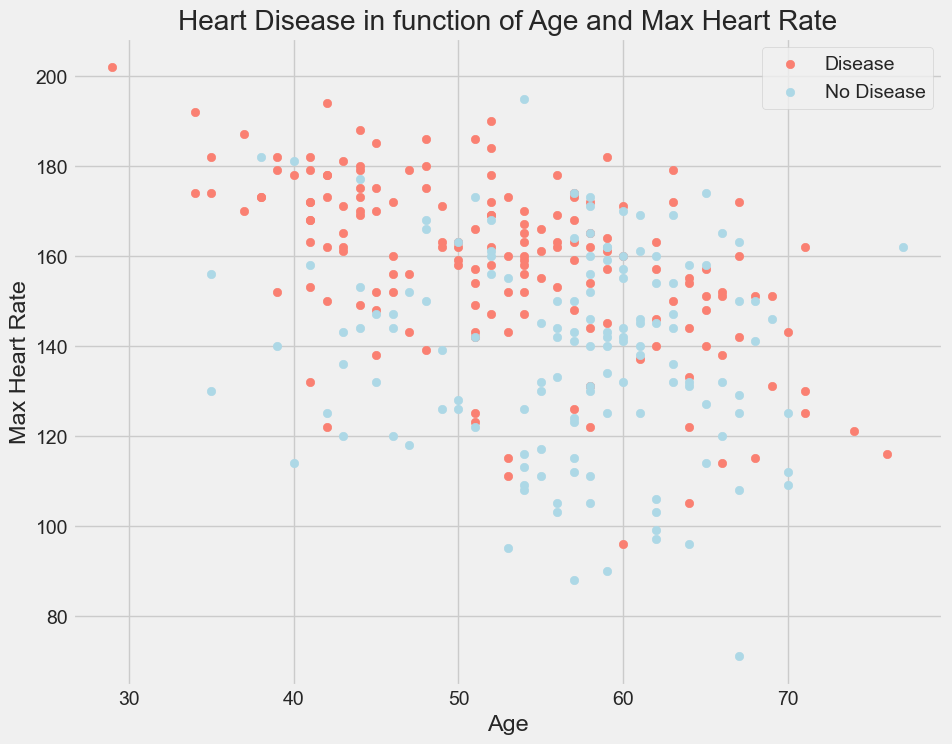

In [16]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [19]:
from sklearn.model_selection import train_test_split  # Importing train_test_split

# Assuming x and y are defined
#spiltting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape)


(303, 13) (242, 13) (61, 13)


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model=LogisticRegression()

In [22]:
#training the logisticRegression model with tranining data
model = LogisticRegression(max_iter=1000)

In [23]:
#training the logisticRegression model with tranining data
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
#model evalution
#accuracy_score
#accuracy on training data
from sklearn.metrics import accuracy_score

# Your code for making predictions and calculating accuracy
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data:', training_data_accuracy)


Accuracy on Training data: 0.8553719008264463


In [25]:
#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy on Test data: ',test_data_accuracy)

Accuracy on Test data:  0.8032786885245902


In [26]:
# Assuming you have split your data into x_train, x_test, y_train, y_test
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
x_test_prediction = model.predict(x_test)

# Confusion matrix on test data
conf_matrix = confusion_matrix(y_test, x_test_prediction)

print('Confusion Matrix on Test data:\n', conf_matrix)

Confusion Matrix on Test data:
 [[22  6]
 [ 6 27]]


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(x_train,y_train)
dtree_pred=dtree_c.predict(x_test)
dtree_ac=round(accuracy_score(dtree_pred,y_test)*100,2)
dtree_ac

65.57

In [30]:
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(x_train,y_train)
rdf_pred=rdf_c.predict(x_test)
rdf_ac=round(accuracy_score(rdf_pred,y_test)*100,2)
rdf_ac

83.61

In [31]:
# Instantiate the Logistic Regression model with a higher max_iter value
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
from sklearn.linear_model import LogisticRegression

# Assuming x_train, x_test, y_train, y_test are already defined

# Define the model
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions using the trained model
input_data = [[58, 1, 0, 114, 318, 0, 2, 140, 0, 4.4, 0, 3, 1]]
prediction = model.predict(input_data)

print(prediction)

# Interpret the prediction
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

[0]
The person does not have heart disease.


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
#building a predictive system
input_data=(42,1,2,130,180,0,1,150,0,0,2,0,2)
#change the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person deos not a Heart Disease')
else:
    print('The person has  Heart Disease')

[1]
The person has  Heart Disease


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
